In [1]:

#%% packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#%% separate independent / dependent features
X = np.array(df.loc[ :, df.columns != 'output'])
y = np.array(df['output'])

In [4]:
print(f"X: {X.shape}, y: {y.shape}")

X: (303, 13), y: (303,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [6]:
X_train.shape[1]

13

array([[18, 12],
       [ 5, 26]], dtype=int64)

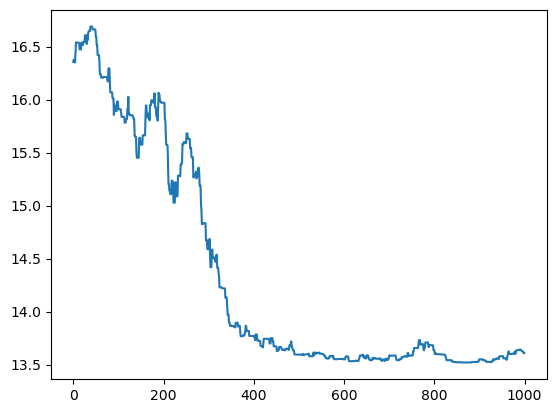

In [9]:
#%% network class
class NeuralNetworkFromScratch:
    def __init__(self,LR,X_train,y_train,X_test,y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []
        
    def activation(self,x):
        return 1/(1+np.exp(-x))
    
    def dactivation(self,x):
        return self.activation(x)*(1-self.activation(x))
    
    def forward(self,X):
        hidden_1 = np.dot(X,self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1
    
    def backward(self,X,y_true):
        hidden_1 = np.dot(X,self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2*(y_pred-y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X
        dL_dw = dL_dpred*dpred_dhidden1*dhidden1_dw
        dL_db = dL_dpred*dpred_dhidden1*dhidden1_db
        return dL_db, dL_dw
    
    def optimizer(self,dL_db,dL_dw):
        self.b = self.b - self.LR*dL_db
        self.w = self.w - self.LR*dL_db
        
    def train(self,iterations):
        for i in range(iterations):
            # random position
            random_pos = np.random.randint(len(self.X_train))
            # forward pass
            y_train_true = self.y_train[random_pos]
            y_pred_true = self.forward(X_train[random_pos])
            #calc training loss
            L = np.sum(np.square(y_pred_true-y_train_true))
            self.L_train.append(L)
            #calc gradients
            dL_db,dL_dw = self.backward(self.X_train[random_pos],self.y_train[random_pos])
            # update weights
            self.optimizer(dL_db,dL_dw)
            # calculate error at each epoch
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_true-y_pred)
            self.L_test.append(L_sum)
        return "training finished"
    
LR = 0.1
ITERATIONS = 1000
#%% model instance and training
model = NeuralNetworkFromScratch(LR=LR,X_train=X_train_scale,y_train=y_train,X_test=X_test_scale,y_test=y_test)
model.train(iterations=ITERATIONS)
# %% check losses
sns.lineplot(x=list(range(len(model.L_test))), y=model.L_test)
# %% iterate over test data
total = X_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(model.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
# %% Calculate Accuracy
acc = correct / total
# %% Baseline Classifier
from collections import Counter
Counter(y_test)
# %% Confusion Matrix
confusion_matrix(y_true = y_test, y_pred = y_preds)
# %

In [8]:
np.random.randn()

0.11268032971842398